In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('H:\\AiQuest\\Ai& ML\\practice\\class 6\\assignment\\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.region.nunique()

4

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df1 = df.copy()

# Encoding

In [8]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
for col in df1.columns:
    if is_numeric_dtype(df1[col]):
        continue
    else:
        df1[col]= le.fit_transform(df1[col])


In [10]:
df1.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


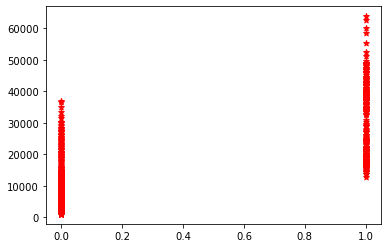

In [11]:
plt.scatter(df1['smoker'],df1['charges'],color= 'red',marker='*')

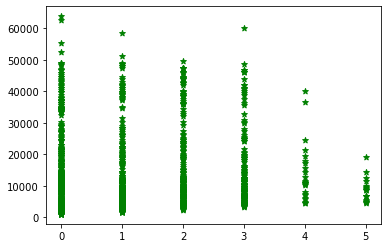

In [12]:
plt.scatter(df1['children'],df1['charges'],color= 'green',marker='*')

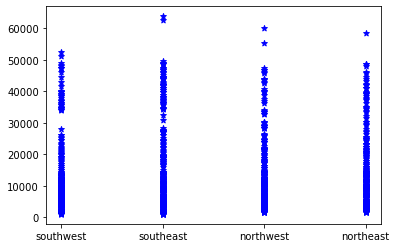

In [13]:
plt.scatter(df['region'],df1['charges'],color= 'blue',marker='*')

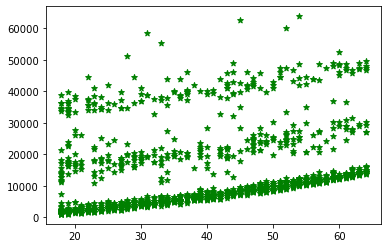

In [14]:
plt.scatter(df1['age'],df1['charges'],color= 'green',marker='*')

In [15]:
x=df1.drop('charges', axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [16]:
y=df1['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Least Square Method

In [17]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=2)



from sklearn.linear_model import LinearRegression
reg=LinearRegression()

reg.fit(xtrain,ytrain)

LinearRegression()

In [18]:
xtrain.head()

,age,sex,bmi,children,smoker,region
355,46,1,27.600,0,0,3
477,25,1,35.625,0,0,1
1156,19,1,44.880,0,1,2
663,18,1,33.660,0,0,2
1216,40,1,25.080,0,0,2


In [19]:
ypredict = reg.predict(xtest)
ypredict

array([ 2.02608979e+03,  1.20507841e+04,  1.04921330e+04,  2.49302173e+03,
        8.31941250e+03,  1.14367049e+04,  3.48622203e+03,  1.35989419e+03,
        1.19520218e+04,  9.67206698e+03,  1.14503622e+04,  5.35763549e+03,
        2.95049938e+04, -2.48372597e+02,  1.30521770e+04,  1.32515720e+04,
        4.29597668e+03,  8.01020318e+03,  2.89698460e+04,  3.09798751e+03,
        1.23535332e+04,  1.91619908e+03,  3.35553389e+04,  3.17588653e+04,
        3.00973589e+04,  8.24819529e+03,  2.51477781e+03,  1.55847964e+04,
        6.28365677e+03,  2.04819304e+03,  9.78710532e+03,  5.89204142e+03,
        4.01084592e+03,  4.90345937e+03,  9.73944860e+03,  5.04646500e+03,
        2.98042637e+04,  6.25834976e+03,  2.72304583e+04,  1.39780589e+04,
        3.03013569e+02,  2.74321178e+04,  7.76323797e+03,  1.09412926e+03,
        1.05663495e+04,  7.71047976e+03,  1.14876649e+04,  8.48749838e+03,
        1.11697412e+04,  1.32506430e+04,  6.53137086e+03, -1.28626709e+03,
        2.58530514e+04,  

In [20]:
from  sklearn.metrics import  mean_squared_error
mse= mean_squared_error(ytest,ypredict)
mse

38010670.32913278

In [21]:
from  sklearn.metrics import  mean_absolute_error
mae= mean_absolute_error(ytest,ypredict)
mae

4288.957513559822

In [22]:
m=reg.coef_
m

array([  244.62646566,  -130.61195022,   345.20224913,   614.9484729 ,
       23352.82553125,  -416.06331304])

In [23]:
c=reg.intercept_
c

-11701.054604981291

In [24]:
reg.score(xtest,ytest)

0.7648415301644245

In [25]:
reg.score(xtrain, ytrain)

0.7427609364883971

In [26]:
ytrain ['predicted_train_charges']= reg.predict(xtrain)
ytrain.head()

355     24603.04837
477      2534.39375
1156     39722.7462
663       1136.3994
1216      5415.6612
Name: charges, dtype: object

# Accuracy

In [27]:
from sklearn.metrics import r2_score
score = r2_score(ytest, ypredict)* 100
score

76.48415301644245